# Importing python libraries

In [55]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import librosa
from matplotlib import pyplot
import matplotlib.pyplot as plt

from keras.layers import Dropout, Dense, Conv2D, MaxPool2D, Flatten, Reshape, BatchNormalization, GlobalAveragePooling2D

# Audio Features

In this notebook, we'll construct following features that we will use to create a single feature vector related to each audio.

* Mel Frequency Cepstral Coefficients
* Mel Spectogram

## Mel Frequency Cepstral Coeffieients (MFCC)


In [2]:
def get_mfcc(audio_file_path):
    y, sr = librosa.load(audio_file_path, offset=0, duration=30)
    mfcc = np.array(librosa.feature.mfcc(y=y, sr=sr))
    return mfcc

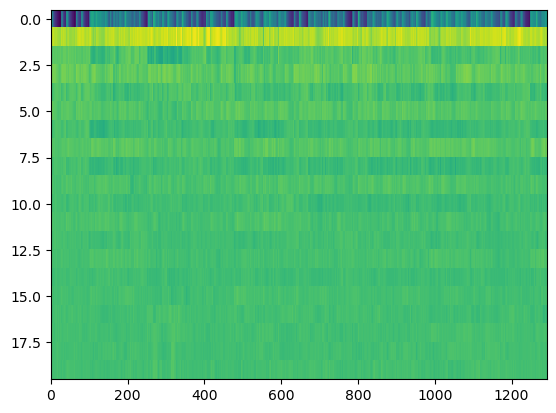

In [15]:
example_file = "../Data/genres_original/blues/blues.00001.wav"
mfcc = get_mfcc(example_file)
pyplot.imshow(mfcc, interpolation='nearest', aspect='auto')
pyplot.show()

## Mel Spectrogram

In [16]:
def get_melspectrogram(audio_file_path):
  y, sr = librosa.load(audio_file_path, offset=0, duration=30)
  melspectrogram = np.array(librosa.feature.melspectrogram(y=y, sr=sr))
  return melspectrogram

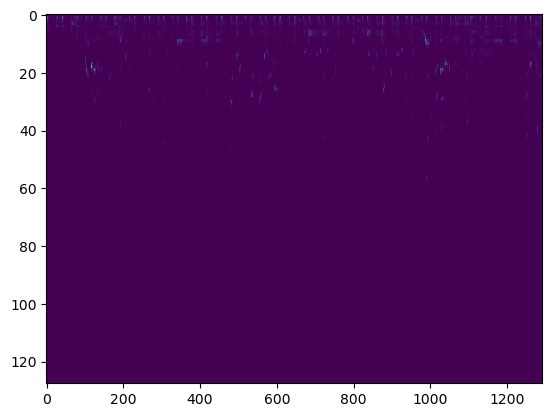

In [17]:
melspectrogram = get_melspectrogram(example_file)
pyplot.imshow(melspectrogram, interpolation='nearest', aspect='auto')
pyplot.show()

In [23]:
def get_feature(file_path):
  # Extracting MFCC feature
  mfcc = get_mfcc(file_path)
  mfcc_mean = mfcc.mean(axis=1)
  mfcc_min = mfcc.min(axis=1)
  mfcc_max = mfcc.max(axis=1)
  mfcc_feature = np.concatenate( (mfcc_mean, mfcc_min, mfcc_max) )

  # Extracting Mel Spectrogram feature
  melspectrogram = get_melspectrogram(file_path)
  melspectrogram_mean = melspectrogram.mean(axis=1)
  melspectrogram_min = melspectrogram.min(axis=1)
  melspectrogram_max = melspectrogram.max(axis=1)
  melspectrogram_feature = np.concatenate( (melspectrogram_mean, melspectrogram_min, melspectrogram_max) )
  
  feature = np.concatenate( (melspectrogram_feature, mfcc_feature) )
  return feature

In [24]:
directory = '../Data/genres_original'
genres = ['reggae','classical','rock', 'blues', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop']
features = []
labels = []
for genre in genres:
    print("Calculating features for genre : " + genre)
    for file in os.listdir(directory+"/"+genre):
        file_path = directory+"/"+genre+"/"+file

        features.append(get_feature(file_path))
        label = genres.index(genre)
        labels.append(label)

Calculating features for genre : reggae
Calculating features for genre : classical
Calculating features for genre : rock
Calculating features for genre : blues
Calculating features for genre : country
Calculating features for genre : disco
Calculating features for genre : hiphop
Calculating features for genre : jazz
Calculating features for genre : metal
Calculating features for genre : pop


## Splitting the Dataset into training, validation and testing parts

In [25]:
permutations = np.random.permutation(300)
features = np.array(features)[permutations]
labels = np.array(labels)[permutations]

features_train = features[0:180]
labels_train = labels[0:180]

features_val = features[180:240]
labels_val = labels[180:240]

features_test = features[240:300]
labels_test = labels[240:300]

## Training the model

In [33]:
inputs = keras.Input(shape=(444), name="feature")
x = keras.layers.Dense(300, activation="relu", name="dense_1")(inputs)
x = keras.layers.Dense(200, activation="relu", name="dense_2")(x)
outputs = keras.layers.Dense(10, activation="softmax", name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [34]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature (InputLayer)        [(None, 444)]             0         
                                                                 
 dense_1 (Dense)             (None, 300)               133500    
                                                                 
 dense_2 (Dense)             (None, 200)               60200     
                                                                 
 predictions (Dense)         (None, 10)                2010      
                                                                 
Total params: 195710 (764.49 KB)
Trainable params: 195710 (764.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
features_train.shape[1], 1

(444, 1)

In [62]:
features_train.shape

(180, 444)

In [35]:
model.compile(
    # Optimizer
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)
history = model.fit(x=features_train.tolist(),y=labels_train.tolist(),verbose=1,validation_data=(features_val.tolist() , labels_val.tolist()), epochs=64)

Epoch 1/64
6/6 [==============================] - 2s 175ms/step - loss: 104.4063 - sparse_categorical_accuracy: 0.3833 - val_loss: 21.0907 - val_sparse_categorical_accuracy: 0.7833
Epoch 2/64
6/6 [==============================] - 0s 39ms/step - loss: 11.4310 - sparse_categorical_accuracy: 0.8111 - val_loss: 13.1602 - val_sparse_categorical_accuracy: 0.7167
Epoch 3/64
6/6 [==============================] - 0s 46ms/step - loss: 10.8899 - sparse_categorical_accuracy: 0.8167 - val_loss: 36.4346 - val_sparse_categorical_accuracy: 0.6333
Epoch 4/64
6/6 [==============================] - 0s 50ms/step - loss: 8.9430 - sparse_categorical_accuracy: 0.8222 - val_loss: 9.6461 - val_sparse_categorical_accuracy: 0.8000
Epoch 5/64
6/6 [==============================] - 0s 50ms/step - loss: 1.1762 - sparse_categorical_accuracy: 0.9278 - val_loss: 12.7657 - val_sparse_categorical_accuracy: 0.7667
Epoch 6/64
6/6 [==============================] - 0s 59ms/step - loss: 0.8855 - sparse_categorical_accurac

6/6 [==============================] - 0s 53ms/step - loss: 5.0333e-08 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.7463 - val_sparse_categorical_accuracy: 0.7833
Epoch 47/64
6/6 [==============================] - 0s 42ms/step - loss: 4.7684e-08 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.7394 - val_sparse_categorical_accuracy: 0.7833
Epoch 48/64
6/6 [==============================] - 0s 34ms/step - loss: 4.6359e-08 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.7413 - val_sparse_categorical_accuracy: 0.7833
Epoch 49/64
6/6 [==============================] - 0s 34ms/step - loss: 4.3048e-08 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.7373 - val_sparse_categorical_accuracy: 0.7833
Epoch 50/64
6/6 [==============================] - 0s 35ms/step - loss: 4.1061e-08 - sparse_categorical_accuracy: 1.0000 - val_loss: 10.7311 - val_sparse_categorical_accuracy: 0.7833
Epoch 51/64
6/6 [==============================] - 0s 35ms/step - loss: 3.9074e-08 - sparse_categ

## Loss Curves

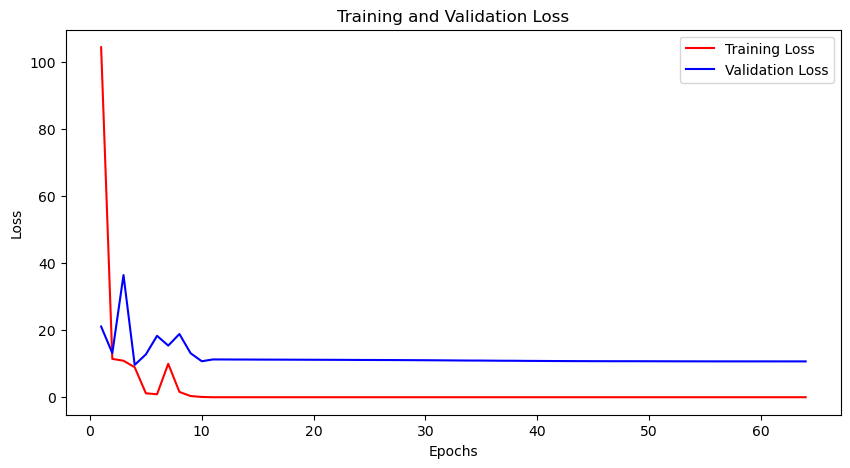

In [41]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss)+1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

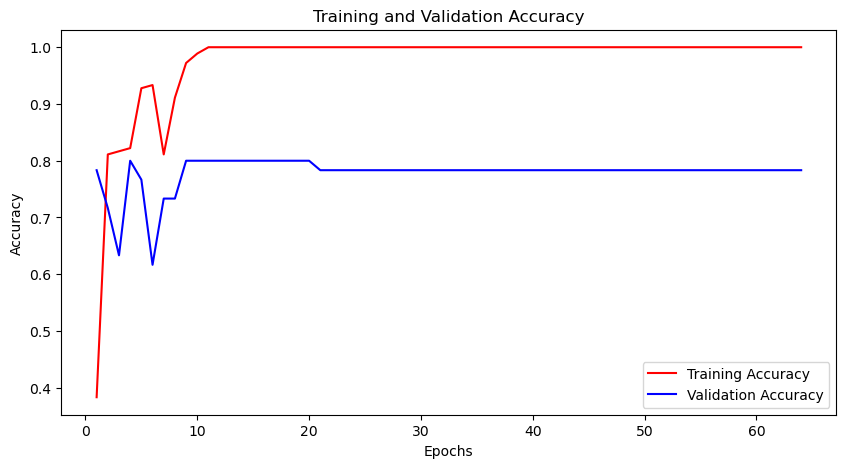

In [43]:
accuracy = history.history["sparse_categorical_accuracy"]
val_accuracy = history.history["val_sparse_categorical_accuracy"]

epochs = range(1, len(loss)+1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

## Model Evaluation

In [27]:
score = model.evaluate(x=features_test.tolist(),y=labels_test.tolist(), verbose=0)
print('Accuracy : ' + str(score[1]*100) + '%')

Accuracy : 85.00000238418579%


## Model Predictions

In [47]:
wav_file = "../Data/genres_original/rock/rock.00000.wav"
feature = get_feature(wav_file)
y = model.predict(feature.reshape(1, 444))
ind = np.argmax(y)
genres[ind]

1/1 [==============================] - 0s 75ms/step


'rock'